# Funciones de distribución de probabilidades
## Distribución Uniforme

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
a = 1
b = 100
n = 1000000
data = np.random.uniform(a, b, n)

(array([ 99775.,  99434., 100787.,  99909.,  99990., 100043.,  99841.,
        100077.,  99948., 100196.]),
 array([ 1.00008891, 10.90007771, 20.80006652, 30.70005533, 40.60004414,
        50.50003295, 60.40002176, 70.30001057, 80.19999937, 90.09998818,
        99.99997699]),
 <a list of 10 Patch objects>)

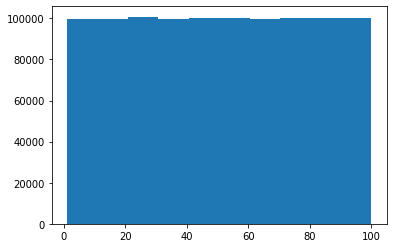

In [6]:
%matplotlib inline
plt.hist(data)

## Distribución Normal

In [17]:
data = np.random.randn(1000000)

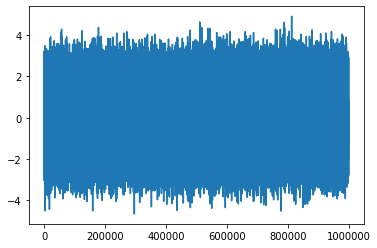

In [18]:
x = range(1,1000001)
plt.plot(x, data)

(array([1.23000e+02, 2.91800e+03, 3.42790e+04, 1.66036e+05, 3.47297e+05,
        3.09450e+05, 1.19206e+05, 1.93560e+04, 1.29700e+03, 3.80000e+01]),
 array([-4.64988995, -3.69492405, -2.73995816, -1.78499227, -0.83002637,
         0.12493952,  1.07990541,  2.03487131,  2.9898372 ,  3.94480309,
         4.89976899]),
 <a list of 10 Patch objects>)

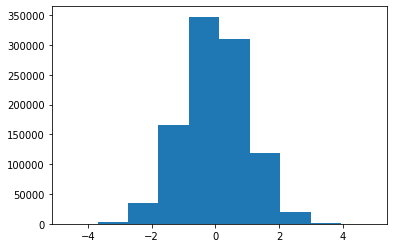

In [19]:
%matplotlib inline
plt.hist(data)

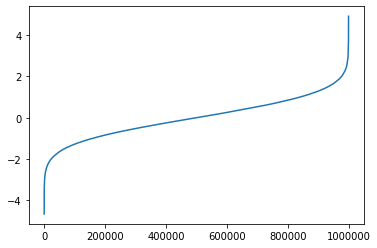

In [20]:
plt.plot(x,sorted(data))

(array([   6.,   32.,  281., 1180., 2576., 3118., 1960.,  711.,  123.,
          13.]),
 array([-5.12280629, -3.11658208, -1.11035788,  0.89586633,  2.90209053,
         4.90831474,  6.91453894,  8.92076315, 10.92698735, 12.93321156,
        14.93943576]),
 <a list of 10 Patch objects>)

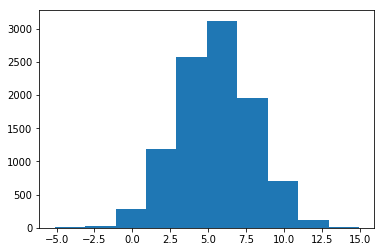

In [34]:
mu = 5.5
sd = 2.5
Z_10000 = np.random.randn(10000)
data = mu + sd * Z_10000 # Z = (X - mu) / sd -> N(0,1), X = mu + sd * Z
plt.hist(data)

In [35]:
data = np.random.randn(2,4)
data

array([[-2.0037831 , -0.21771535, -1.90002375,  0.88870408],
       [-0.93380982, -0.94088418,  0.38366571, -0.0243514 ]])

## La simulación de Monte Carlo

* Generamos dos números aleatorios uniforme x e y entre 0 y 1 en total 1000 veces.
* Calcularemos $z = x^2 + y^2$:
    * Si $z < 1 \rightarrow$ estamos dentro del círculo.
    * Si $z \geq 1 \rightarrow$ estamos fuera del círculo.
* Calculamos el número total de veces que están dentro del círculo y lo dividimos entre el número total de intentos para obtener una aproximación de la probabilidad de caer dentro del círculo.
* Usamos dicha probabilidad para aproximar el valor de π.
* Repetimos el experimento un número suficiente de veces (por ejemplo 100), para obtener (100) diferentes aproximaciones de π. 
* Calculamos el promedio de los 100 experimentos anteriores para dar un valor final de π.
    

In [22]:
def pi_montecarlo(n, n_exp):
    pi_avg = 0
    pi_value_list = []
    for i in range(n_exp):
        value = 0
        x = np.random.uniform(0,1,n).tolist()
        y = np.random.uniform(0,1,n).tolist()
        for j in range(n):
            z = np.sqrt(x[j] * x[j] + y[j] * y[j])
            if z<=1:
                value += 1
        float_value = float(value)
        pi_value = float_value * 4 / n
        pi_value_list.append(pi_value)
        pi_avg += pi_value

    pi = pi_avg/n_exp

    print(pi)
    fig = plt.plot(pi_value_list)
    return (pi, fig)

3.1416075200000013


(3.1416075200000013, [<matplotlib.lines.Line2D at 0x1bfddef1e08>])

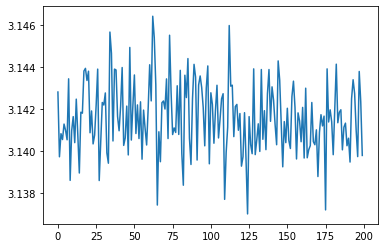

In [23]:
pi_montecarlo(1000000, 200)

### Dummy Data Sets

In [24]:
n = 1000000
data = pd.DataFrame(
    {
        'A' : np.random.randn(n),
        'B' : 1.5 + 2.5 * np.random.randn(n),
        'C' : np.random.uniform(5, 32, n)
    }
)

In [25]:
data.describe()

,A,B,C
count,1000000.000000,1000000.000000,1000000.000000
mean,0.001185,1.498047,18.497246
std,0.999736,2.501124,7.797530
min,-5.213307,-11.020237,5.000002
25%,-0.673311,-0.191468,11.743552
50%,0.000724,1.496422,18.487626
75%,0.676643,3.184574,25.243808
max,4.638372,12.652982,31.999915


(array([1.40000e+01, 5.34000e+02, 1.13020e+04, 8.95300e+04, 2.85183e+05,
        3.70129e+05, 1.96923e+05, 4.26310e+04, 3.61800e+03, 1.36000e+02]),
 array([-5.21330744, -4.22813951, -3.24297157, -2.25780364, -1.27263571,
        -0.28746777,  0.69770016,  1.6828681 ,  2.66803603,  3.65320396,
         4.6383719 ]),
 <a list of 10 Patch objects>)

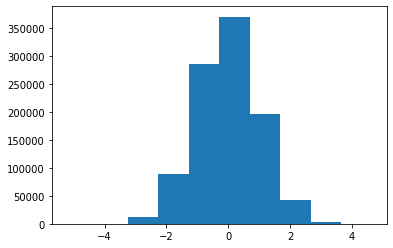

In [26]:
plt.hist(data["A"])

(array([1.70000e+01, 8.41000e+02, 1.42810e+04, 9.63020e+04, 2.81642e+05,
        3.56816e+05, 1.97473e+05, 4.74420e+04, 4.98400e+03, 2.02000e+02]),
 array([-11.02023698,  -8.65291506,  -6.28559315,  -3.91827123,
         -1.55094931,   0.8163726 ,   3.18369452,   5.55101644,
          7.91833835,  10.28566027,  12.65298219]),
 <a list of 10 Patch objects>)

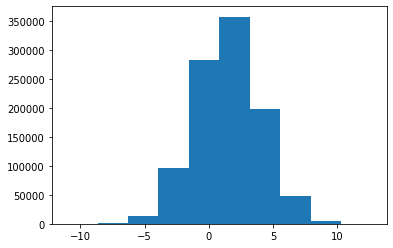

In [27]:
plt.hist(data["B"])

(array([100089., 100187., 100033.,  99958., 100227.,  99646., 100012.,
         99658.,  99818., 100372.]),
 array([ 5.00000152,  7.69999282, 10.39998413, 13.09997543, 15.79996674,
        18.49995804, 21.19994935, 23.89994065, 26.59993195, 29.29992326,
        31.99991456]),
 <a list of 10 Patch objects>)

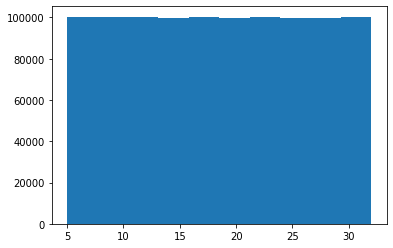

In [28]:
plt.hist(data["C"])

In [29]:
data = pd.read_csv("../datasets/customer-churn-model/Customer Churn Model.txt")

In [30]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [31]:
colum_names = data.columns.values.tolist()

In [32]:
a = len(colum_names)
a

21

In [33]:
new_data = pd.DataFrame(
    {
        'Column Name': colum_names,
        'A' : np.random.randn(a),
        'B' : np.random.uniform(0,1,a)
    }, index = range(42, 42 + a)
)

In [34]:
new_data

,Column Name,A,B
42,State,-0.670270,0.250254
43,Account Length,-2.728277,0.280332
44,Area Code,-0.164569,0.031394
45,Phone,2.100947,0.794989
46,Int'l Plan,-0.100637,0.481508
47,VMail Plan,0.141719,0.454612
48,VMail Message,-0.467085,0.026055
49,Day Mins,-0.318820,0.457778
50,Day Calls,0.325884,0.161318
51,Day Charge,0.292141,0.415398
